In [1]:
import numpy as np
import os
import string
import matplotlib.pyplot as plt

In [2]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
plt.rcParams["figure.figsize"] = cm2inch(16,8)
plt.rcParams.update({'font.size':10})
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [8]:
systems=["5XEZ_LB1", "5XEZ_LB2", "5XEZ_LB3", "5XEZ_LB4", "5XEZ_LB_semi-complex", "5XEZ_LB_semi-complex2", "5YQZ_LB_semi-complex", "5YQZ_LB_semi-complex2", "5XEZ_LB_semi-complex3"]
begin_time_ps=["14000000", "14000000" ,"14000000" ,"14000000" ,"28000000", "35000000", "23000000", "36000000", "30000000"]
end_time_ps=["14500000" ,"14500000" ,"14500000", "14500000", "28500000", "35500000", "23500000", "36500000", "-1"]

In [4]:
lipid_dir = {"5XEZ_LB1":"POPC, POPS",
            "5XEZ_LB2":"POPC, POPE",
            "5XEZ_LB3":"POPC, POPA",
            "5XEZ_LB4":"POPC, POPG",
            "5XEZ_LB_semi-complex":"POPC, POPS, POPE, POPA, POPG",
            "5XEZ_LB_semi-complex2":"POPC, POPS, POPE, POPA, POPG, POP2, CHOL",
            "5YQZ_LB_semi-complex":"POPC, POPS, POPE, POPA, POPG",
            "5YQZ_LB_semi-complex2":"POPC, POPS, POPE, POPA, POPG, POP2, CHOL",
            "5XEZ_LB_semi-complex3":"POPC, POPS, POPE, POPA, POPG, PAP6, CHOL"}

In [5]:
#ndx_cmd= "for i in `ls GRO/*[0-3].gro`; do base=`basename $i .gro`; ./Make_ndx_rdf.py -n ${base}; done"
#os.system(ndx_cmd)

### Calculating RDF for all the lipids in the different systems

#### only using the last 0.5 µs

In [6]:
# for idx, s in enumerate(systems):
#     for r in range(3): 
#         print ("Replica", r)
#         tpr = "TPR/{0:s}_{1:d}_nowat.tpr".format(s,r)
#         ndx = "NDX/{0:s}_{1:d}_rdf.ndx".format(s,r)
#         xtc = "XTC/{0:s}_{1:d}_nowat_res_center.xtc".format(s,r)
#         b = begin_time_ps[idx]
#         e = end_time_ps[idx]
#         lipids = lipid_dir[s]
#         sel = [ "{0:s}".format(l) for l in lipids.split(',') ]
#         output_base = "RDF/SURF_XY/{0:s}_{1:d}_nowat".format(s,r)
        
#         for sele in sel:
#             #print ("lipid {0:s}".format(sele))
#             output_xvg = output_base+"_{0:s}_rdf.xvg".format(sele.split('&')[0]).translate({ord(c): None for c in string.whitespace})
#             if os.path.exists(output_xvg):
#                 print ("{0:s} exists".format(output_xvg))
#                 continue
#             else:
#                 lipid_sel = sele.translate({ord(c): None for c in string.whitespace})
#                 print ('lipid selection', lipid_sel)
#                 rdf_cmd = "gmx rdf -f {0:s} -s {1:s} -n {2:s} -o {3:s} -dt 10 -surf mol -xy -ref Protein -sel {4:s} -b {5:s} -e {6:s}".format(xtc, tpr, ndx, output_xvg, lipid_sel, b, e)
#                 print (rdf_cmd)
#                 os.system(rdf_cmd)

In [ ]:
for idx, s in enumerate(systems):
    for r in range(3): 
        print ("Replica", r)
        tpr = "TPR/{0:s}_{1:d}_nowat.tpr".format(s,r)
        ndx = "NDX/{0:s}_{1:d}_nowat_rdf.ndx".format(s,r)
        xtc = "XTC/{0:s}_{1:d}_nowat_res_center.xtc".format(s,r)
        b = begin_time_ps[idx]
        e = end_time_ps[idx]
        lipids = lipid_dir[s]
        sel = [ "{0:s}".format(l) for l in lipids.split(',') ]
        output_base = "RDF/{0:s}_{1:d}_nowat".format(s,r)
        
        for sele in sel:
            #print ("lipid {0:s}".format(sele))
            output_xvg = output_base+"_{0:s}_rdf.xvg".format(sele.split('&')[0]).translate({ord(c): None for c in string.whitespace})
            if os.path.exists(output_xvg):
                print ("{0:s} exists".format(output_xvg))
                continue
            else:
                lipid_sel = sele.translate({ord(c): None for c in string.whitespace})
                print ('lipid selection', lipid_sel)
                rdf_cmd = "gmx rdf -f {0:s} -s {1:s} -n {2:s} -o {3:s} -dt 1000 -ref Protein -sel {4:s}".format(xtc, tpr, ndx, output_xvg, lipid_sel)
                #rdf_cmd = "gmx rdf -f {0:s} -s {1:s} -n {2:s} -o {3:s} -dt 10 -ref Protein -sel {4:s} -b {5:s} -e {6:s}".format(xtc, tpr, ndx, output_xvg, lipid_sel, b, e)
                print (rdf_cmd)
                os.system(rdf_cmd)

Replica 0
RDF/5XEZ_LB1_0_nowat_POPC_rdf.xvg exists
RDF/5XEZ_LB1_0_nowat_POPS_rdf.xvg exists
Replica 1
RDF/5XEZ_LB1_1_nowat_POPC_rdf.xvg exists
RDF/5XEZ_LB1_1_nowat_POPS_rdf.xvg exists
Replica 2
RDF/5XEZ_LB1_2_nowat_POPC_rdf.xvg exists
RDF/5XEZ_LB1_2_nowat_POPS_rdf.xvg exists
Replica 0
RDF/5XEZ_LB2_0_nowat_POPC_rdf.xvg exists
RDF/5XEZ_LB2_0_nowat_POPE_rdf.xvg exists
Replica 1
RDF/5XEZ_LB2_1_nowat_POPC_rdf.xvg exists
RDF/5XEZ_LB2_1_nowat_POPE_rdf.xvg exists
Replica 2
lipid selection POPC
gmx rdf -f XTC/5XEZ_LB2_2_nowat_res_center.xtc -s TPR/5XEZ_LB2_2_nowat.tpr -n NDX/5XEZ_LB2_2_nowat_rdf.ndx -o RDF/5XEZ_LB2_2_nowat_POPC_rdf.xvg -dt 1000 -ref Protein -sel POPC
lipid selection POPE
gmx rdf -f XTC/5XEZ_LB2_2_nowat_res_center.xtc -s TPR/5XEZ_LB2_2_nowat.tpr -n NDX/5XEZ_LB2_2_nowat_rdf.ndx -o RDF/5XEZ_LB2_2_nowat_POPE_rdf.xvg -dt 1000 -ref Protein -sel POPE
Replica 0
RDF/5XEZ_LB3_0_nowat_POPC_rdf.xvg exists
RDF/5XEZ_LB3_0_nowat_POPA_rdf.xvg exists
Replica 1
RDF/5XEZ_LB3_1_nowat_POPC_rdf.xvg 

In [8]:
# for idx, s in enumerate(systems):
#     for r in range(3): 
#         print ("Replica", r)
#         tpr = "TPR/{0:s}_{1:d}_nowat.tpr".format(s,r)
#         ndx = "NDX/{0:s}_{1:d}_rdf.ndx".format(s,r)
#         xtc = "XTC/{0:s}_{1:d}_nowat_res_center.xtc".format(s,r)
#         b = begin_time_ps[idx]
#         e = end_time_ps[idx]
#         lipids = lipid_dir[s]
#         sel = [ "{0:s}".format(l) for l in lipids.split(',') ]
#         output_base = "RDF/SURF/{0:s}_{1:d}_nowat".format(s,r)
        
#         for sele in sel:
#             #print ("lipid {0:s}".format(sele))
#             output_xvg = output_base+"_{0:s}_rdf.xvg".format(sele.split('&')[0]).translate({ord(c): None for c in string.whitespace})
#             if os.path.exists(output_xvg):
#                 print ("{0:s} exists".format(output_xvg))
#                 continue
#             else:
#                 lipid_sel = sele.translate({ord(c): None for c in string.whitespace})
#                 print ('lipid selection', lipid_sel)
#                 rdf_cmd = "gmx rdf -f {0:s} -s {1:s} -n {2:s} -o {3:s} -surf mol -dt 10 -ref Protein -sel {4:s} -b {5:s} -e {6:s}".format(xtc, tpr, ndx, output_xvg, lipid_sel, b, e)
#                 print (rdf_cmd)
#                 os.system(rdf_cmd)

# Plotting RDF

In [9]:
def load_rdf (lipid):
    '''Load occupancy data for considering only the headgroups of the lipids'''
    data_dir =  {"5XEZ_LB1":"",
                "5XEZ_LB2":"",
                "5XEZ_LB3":"",
                "5XEZ_LB4":"",
                "5XEZ_LB_semi-complex":"",
                "5XEZ_LB_semi-complex2":"",
                "5YQZ_LB_semi-complex":"",
                "5YQZ_LB_semi-complex2":""}
    for s in systems:
        data_loc = []
        for r in range(3):
            try:
                data_loc.append(np.loadtxt('RDF/{0:s}_{1:d}_nowat_{2:s}_rdf.xvg'.format(s,r,lipid), comments=('#', '@')))
            except OSError:
                #print ('No such file: RDF/{0:s}_{1:d}_nowat_{2:s}_rdf.xvg'.format(s,r,lipid))
                continue
        data_dir[s]=data_loc
    return data_dir

In [18]:
def plot_rdf (systems):
    '''For RDF'''
    x_max = 2
    color_list = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']

    fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True)

    unique_lipids = ['POPC','POPS','POPE','POPA','POPG']

    for idx, l in enumerate(unique_lipids[:3]):
        dir_data = load_rdf(l)

        for ndx, s in enumerate(systems):
            if len(dir_data[s])==0:
                continue
            else:
                data = dir_data[s]
                #print (np.array(data).shape)
                min_shape = np.min([ i.shape[0] for i in data ] ) - 1 
                data_array = np.array([ i[:min_shape,:] for i in data ])
                
                Ava = np.average(data_array, axis=0)
                Std = np.std(data_array, axis=0)
                ax[0,idx].plot(Ava[:,0], Ava[:,1], label=s, color=color_list[ndx], alpha=0.7)
                ax[0,idx].fill_between(Ava[:,0], Ava[:,1]-Std[:,1], Ava[:,1]+Std[:,1], alpha=0.7, edgecolor=color_list[ndx], facecolor=color_list[ndx])
                ax[0,0].set_xlim(0,x_max)
                ax[0,idx].set_title(l)
                ax[0,idx].axvline(x=0.7,ymin=0, ymax=3, color='black', linewidth=1.5)
                ax[0,idx].axvline(x=1.2,ymin=0, ymax=3, color='black', linestyle='--', linewidth=1.5)
                ax[0,idx].axvline(x=1.6,ymin=0, ymax=3, color='black', linestyle=':', linewidth=1.5)
                #ax[0,0].legend(loc='best')

    for idx, l in enumerate(unique_lipids[3:][:-1]):
        dir_data = load_rdf(l)
        #print (l)

        for ndx, s in enumerate(systems):
            if len(dir_data[s])==0:
                continue
            else:
                data = dir_data[s]
                #print (np.array(data).shape)
                min_shape = np.min([ i.shape[0] for i in data ] ) - 1 
                data_array = np.array([ i[:min_shape,:] for i in data ])
                
                Ava = np.average(data_array, axis=0)
                Std = np.std(data_array, axis=0)
                ax[1,idx].plot(Ava[:,0], Ava[:,1], label=s, color=color_list[ndx], alpha=0.7)
                #ax[1,idx].plot(Ava[:,0], Ava[:,1], color=color_list[ndx], alpha=0.7)
                ax[1,idx].fill_between(Ava[:,0], Ava[:,1]-Std[:,1], Ava[:,1]+Std[:,1], alpha=0.7, edgecolor=color_list[ndx], facecolor=color_list[ndx])
                ax[1,0].set_xlim(0,x_max)
                ax[1,idx].set_title(l)
                #ax[1,0].legend(loc='best')
                #ax[1,idx].axvline(x=0.4,ymin=0, ymax=3)
                #ax[1,idx].axvline(x=0.4,ymin=0, ymax=3, color='black', linestyle='--')
                ax[1,idx].axvline(x=0.7,ymin=0, ymax=3, color='black', linewidth=1.5)
                ax[1,idx].axvline(x=1.2,ymin=0, ymax=3, color='black', linestyle='--', linewidth=1.5)
                ax[1,idx].axvline(x=1.6,ymin=0, ymax=3, color='black', linestyle=':', linewidth=1.5)

    ax[0,0].legend(loc='upper center', bbox_to_anchor=(2, -1.5),
              fancybox=True, shadow=True, ncol=3, frameon=False)

    fig.tight_layout()
    return

In [38]:
def plot_rdf_simple (systems, outname):
    '''For RDF'''
    x_max = 2
    #color_list = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']
    color_list = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','grey','#a65628','#f781bf']

    fig, ax = plt.subplots(ncols=5, sharey=True, sharex=True, figsize=(cm2inch(32,6)))

    unique_lipids = ['POPC','POPS','POPE','POPA','POPG']

    for idx, l in enumerate(unique_lipids):
        #print (idx)
        dir_data = load_rdf(l)

        for ndx, s in enumerate(systems):
            if len(dir_data[s])==0:
                continue
            else:
                data = dir_data[s]
                min_shape = np.min([ i.shape[0] for i in data ] ) - 1 
                data_array = np.array([ i[:min_shape,:] for i in data ])
                
                Ava = np.average(data_array, axis=0)
                Std = np.std(data_array, axis=0)
                #print ('cal done')
                #print (idx)
                ax[idx].plot(Ava[:,0], Ava[:,1], label=s, color=color_list[ndx], alpha=0.7)
                ax[idx].fill_between(Ava[:,0], Ava[:,1]-Std[:,1], Ava[:,1]+Std[:,1], alpha=0.2,edgecolor=color_list[ndx], facecolor=color_list[ndx])
                #ax[0,idx].fill_between(Ava[:,0], Ava[:,1]-Std[:,1], Ava[:,1]+Std[:,1], alpha=0.7, edgecolor=color_list[ndx], facecolor=color_list[ndx])
                
                ax[idx].set_title(l)
                ax[idx].axvline(x=0.7,ymin=0, ymax=3, color='black', linewidth=1.5)
                ax[idx].axvline(x=1.2,ymin=0, ymax=3, color='black', linestyle='--', linewidth=1.5)
                ax[idx].axvline(x=1.6,ymin=0, ymax=3, color='black', linestyle=':', linewidth=1.5)
                ax[idx].grid(alpha=0.5)
    ax[0].set_xlim(0,x_max)          
    ax[0].legend(loc='upper center', bbox_to_anchor=(3, -0.3),
              fancybox=True, shadow=True, ncol=4, frameon=False)
    ax[0].set_ylabel('RDF')
    ax[2].set_xlabel('Distance (nm)')
    fig.tight_layout()
    plt.savefig('RDF_Simple_all_{0:s}.png'.format(outname), dpi=300, bbox_inches='tight')
    plt.savefig('RDF_Simple_all_{0:s}.svg'.format(outname), bbox_inches='tight')
    return

In [41]:
def plot_rdf_simple2 (systems, outname):
    '''For RDF'''
    x_max = 2
    #color_list = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']
    color_list = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','grey','#a65628','#f781bf']

    fig, ax = plt.subplots(ncols=7, sharey=True, sharex=True, figsize=(cm2inch(40,6)))

    unique_lipids = ['POPC','POPS','POPE','POPA','POPG','POP2','CHOL']

    for idx, l in enumerate(unique_lipids):
        #print (idx)
        dir_data = load_rdf(l)

        for ndx, s in enumerate(systems):
            if len(dir_data[s])==0:
                continue
            else:
                data = dir_data[s]
                min_shape = np.min([ i.shape[0] for i in data ] ) - 1 
                data_array = np.array([ i[:min_shape,:] for i in data ])
                
                Ava = np.average(data_array, axis=0)
                Std = np.std(data_array, axis=0)
                #print ('cal done')
                #print (idx)
                ax[idx].plot(Ava[:,0], Ava[:,1], label=s, color=color_list[ndx], alpha=0.7)
                ax[idx].fill_between(Ava[:,0], Ava[:,1]-Std[:,1], Ava[:,1]+Std[:,1], alpha=0.7, edgecolor=color_list[ndx], facecolor=color_list[ndx])
                
                ax[idx].set_title(l)
                ax[idx].axvline(x=0.7,ymin=0, ymax=3, color='black', linewidth=1.5)
                ax[idx].axvline(x=1.2,ymin=0, ymax=3, color='black', linestyle='--', linewidth=1.5)
                ax[idx].axvline(x=1.6,ymin=0, ymax=3, color='black', linestyle=':', linewidth=1.5)
                ax[idx].grid(alpha=0.5)
    ax[0].set_xlim(0,x_max)          
    ax[0].legend(loc='upper center', bbox_to_anchor=(3, -0.3),
              fancybox=True, shadow=True, ncol=4, frameon=False)
    ax[0].set_ylabel('RDF')
    ax[3].set_xlabel('Distance (nm)')
    fig.tight_layout()
    plt.savefig('RDF_Simple_all_{0:s}.png'.format(outname), dpi=300, bbox_inches='tight')
    plt.savefig('RDF_Simple_all_{0:s}.svg'.format(outname), bbox_inches='tight')
    return

In [44]:
pwd

'/home/au447022/Documents/GCGR_Complex_LB/ANALYSIS'

In [34]:
#systems=["5XEZ_LB1", "5XEZ_LB2", "5XEZ_LB3", "5XEZ_LB4", "5XEZ_LB_semi-complex", "5XEZ_LB_semi-complex2","5YQZ_LB_semi-complex", "5YQZ_LB_semi-complex2"]
systems=["5XEZ_LB1", "5XEZ_LB2", "5XEZ_LB3", "5XEZ_LB4"]

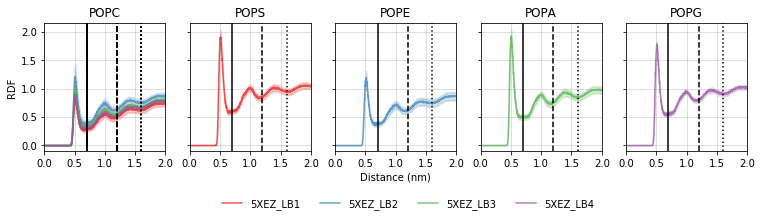

In [39]:
plot_rdf_simple(systems, 'LB1-4')

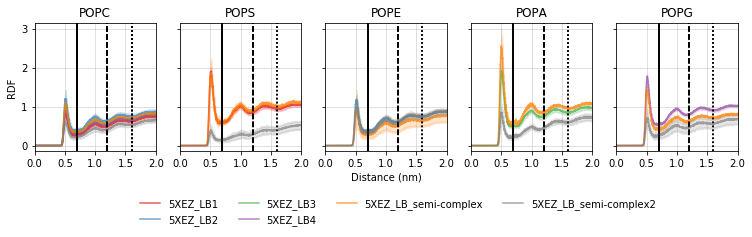

In [40]:
systems=["5XEZ_LB1", "5XEZ_LB2", "5XEZ_LB3", "5XEZ_LB4", "5XEZ_LB_semi-complex", "5XEZ_LB_semi-complex2"]
#plot_rdf(systems)
plot_rdf_simple(systems, 'IA_all')

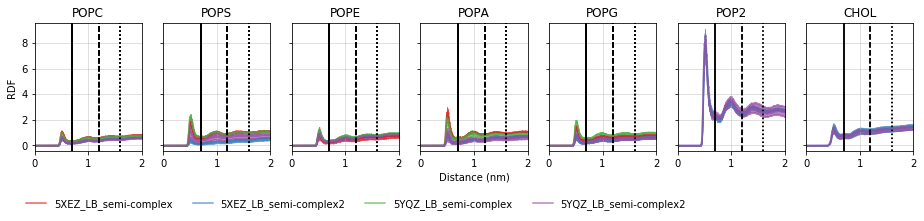

In [42]:
systems=["5XEZ_LB_semi-complex", "5XEZ_LB_semi-complex2", "5YQZ_LB_semi-complex", "5YQZ_LB_semi-complex2"]
#plot_rdf(systems)
plot_rdf_simple2(systems, 'complex_all')

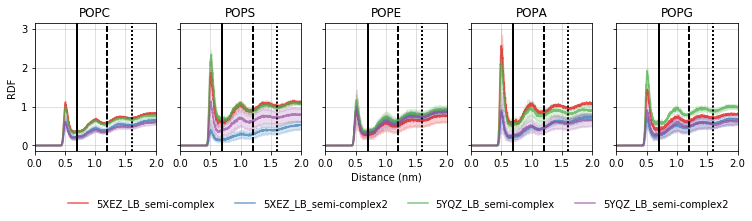

In [43]:
systems=["5XEZ_LB_semi-complex", "5XEZ_LB_semi-complex2", "5YQZ_LB_semi-complex", "5YQZ_LB_semi-complex2"]
#plot_rdf(systems)
plot_rdf_simple(systems, 'complex_all2')